In [ ]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [282]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# loading dataset
url = 'https://drive.google.com/uc?id=1aDdXwh9a7G3mwP0kc-Rw0RoOrre8i_Lk'
dataset = pd.read_csv(url, header=None).values

#splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(dataset[:,0:8],dataset[:,8],test_size=0.1,random_state=30)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(16, activation='relu', input_shape=(8,)))
my_first_nn.add(Dense(8, activation='relu'))
my_first_nn.add(Dense(64, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))

#training the model
my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train,Y_train,epochs=100,initial_epoch=0)

print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test,Y_test))

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.4181 - acc: 0.5065
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3390 - acc: 0.6498
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3119 - acc: 0.6151
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2971 - acc: 0.6266
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2925 - acc: 0.6599
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2918 - acc: 0.6469
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2823 - acc: 0.6556
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2531 - acc: 0.6469
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2302 - acc: 0.6773
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2271 - acc: 0.6469
Epoch 11/100
22/22 [==============================] - 0s 1m

In [ ]:
#2 In class programming (mnist):
#1. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
#activation to tanh or sigmoid and see what happens.
#2. Run the same code without scaling the images and check the performance?
#3. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on
# that single image.

Epoch 1/10
235/235 [==============================] - 9s 36ms/step - loss: 0.4068 - accuracy: 0.8728 - val_loss: 0.2498 - val_accuracy: 0.9226
Epoch 2/10
235/235 [==============================] - 9s 38ms/step - loss: 0.1803 - accuracy: 0.9451 - val_loss: 0.1708 - val_accuracy: 0.9479
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1201 - accuracy: 0.9625 - val_loss: 0.1251 - val_accuracy: 0.9608
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0894 - accuracy: 0.9719 - val_loss: 0.0822 - val_accuracy: 0.9741
Epoch 5/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.1532 - val_accuracy: 0.9557
Epoch 6/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0496 - accuracy: 0.9840 - val_loss: 0.0895 - val_accuracy: 0.9717
Epoch 7/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0933 - val_accuracy: 0.9740

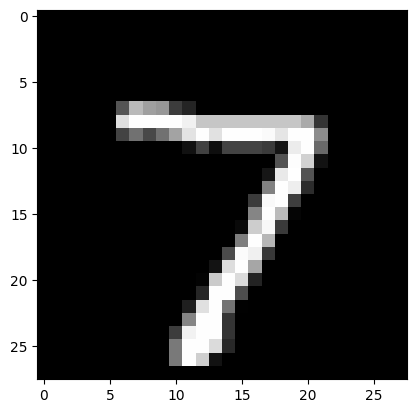

1/1 [==============================] - 0s 60ms/step
Predicted Class: 7, Actual Class: 7


In [300]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Loading the data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

# Processing the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

# Converting data to float
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Scaling data
train_data /=255.0
test_data /=255.0

# One-hot encoding the labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating the network with 3 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Plotting an image from the test dataset
plt.imshow(test_images[0], cmap='gray')
plt.show()

# Predicting the class
test_image = test_data[0].reshape(1, dimData)
predicted_class = np.argmax(model.predict(test_image), axis=-1)
print(f"Predicted Class: {predicted_class[0]}, Actual Class: {test_labels[0]}")